In [2]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display

import visuals as vs

%matplotlib inline

data = pd.read_csv('/data/tmpexec/census.csv')
display(data.head(5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [14]:
n_records = data.shape[0]
display(n_records)
income = data['income'].value_counts()
print (income)

45222

<=50K    34014
>50K     11208
Name: income, dtype: int64


In [17]:
n_greater_50k = 11208
n_at_most_50K = 34014
greater_percent = 11208/45222
print("greater_percent:{}".format(greater_percent))

greater_percent:0.2478439697492371


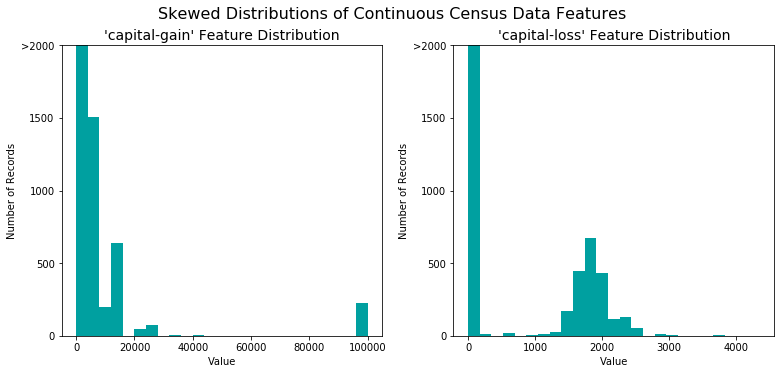

In [18]:
income_raw = data['income']
feature_raw = data.drop('income',axis=1)
vs.distribution(data)

In [33]:
feature_onehot = pd.get_dummies(feature_raw)
#income_onehot = pd.get_dummies(income_raw)
income_category = income_raw.apply(lambda x: 0 if x=='<=50K' else 1)
print (income_category.value_counts())

0    34014
1    11208
Name: income, dtype: int64


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(feature_onehot, income_category, test_size=0.2)

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
from sklearn.metrics import f1_score

y_pred = clf.predict(X_test)
print (f1_score(y_test, y_pred))

0.6056263269639066
